In [1]:
import pandas as pd

In [4]:
df =pd.read_csv('election.csv')

In [5]:
df.head()

,id,clean_text,polarity,place
0,1.11772E+18,RT chitraSD Jogging RahulGandhi ’ memory famil...,0,Madras
1,1118061974292533249,AAP INC want alliance stop division Anti-Modi ...,0,NaN
2,1117870131969810432,RT pankaj_shankar She priyankagandhi slams Mod...,0,NaN
3,1.1177E+18,RT airnewsalerts SC says RahulGandhi 's remark...,0,New Delhi
4,1117850484327366656,RT sachinsingh1010 75 year old Govindraj kille...,0,New Delhi Varanasi


In [7]:
ndf=df.drop(['id'],axis=1)

In [8]:
ndf

,clean_text,polarity,place
0,RT chitraSD Jogging RahulGandhi ’ memory famil...,0,Madras
1,AAP INC want alliance stop division Anti-Modi ...,0,NaN
2,RT pankaj_shankar She priyankagandhi slams Mod...,0,NaN
3,RT airnewsalerts SC says RahulGandhi 's remark...,0,New Delhi
4,RT sachinsingh1010 75 year old Govindraj kille...,0,New Delhi Varanasi
...,...,...,...
10360,RT munavvarshihab Considering present situatio...,1,"Kozhikode, India"
10361,RahulGandhi first term implementation nyaay ht...,1,"Karimnagar, India"
10362,RT gossiper_ Conspiracy Telangana Lok Sabha Po...,1,"Guntur, AP"
10363,RT MODIfiedTamilan சூப்பர் பிரதமர் மோடி மதுரை ...,0,NaN


In [9]:
summed_df = ndf.groupby('place').sum()

In [11]:
summed_df.head()

,clean_text,polarity
place,,
"BINDEKHALPUR,INDIA",RT drshamamohd Why EC taken action PM Modi amp...,2
India,RT top_gun55 IYC RahulGandhi priyankagandhi Ra...,8
Instagram: @advosushildixit,Appointed Chairman Legal Dept Congress.. INC I...,8
"Lucknow,Uttar Pradesh, India",Silence women politicians Azam Khan 's lewd .....,0
Rover..,RT SudheenKulkarni Has use kind foul language ...,2


In [22]:
ndf = ndf.astype(str)

In [24]:
import nltk
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [26]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]  # Using verb pos for lemmatization
    # Convert tokens back to string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [27]:
ndf['cleaned_text'] = ndf['text'].apply(clean_text)

# Now ndf['cleaned_text'] is the cleaned column
print(ndf[['cleaned_text']].head())

                                        cleaned_text
0  South India 2024 Loksabha Opinion Poll 132 sea...
1  Veteran actor Nana Patekar say alternative BJP...
2  South India BJP 2019 Loksabha Karnataka 25 Tel...
3               Issh baar 357 seat Loksabha election
4  Total number time MMS lok sabha seat ZERO Henc...


In [28]:
ndf.head()

,text,cleaned_text
0,South India 2024 Loksabha Opinion Poll 132 sea...,South India 2024 Loksabha Opinion Poll 132 sea...
1,"Veteran actor Nana Patekar says, ""There is no ...",Veteran actor Nana Patekar say alternative BJP...
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,South India BJP 2019 Loksabha Karnataka 25 Tel...
3,Issh baar 357 seats in Loksabha election.,Issh baar 357 seat Loksabha election
4,Total number of times MMS won his own lok sabh...,Total number time MMS lok sabha seat ZERO Henc...


In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [30]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.tokenize import word_tokenize

def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

def sentiment_score(text):
    """Compute the sentiment score of the input text."""
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    
    pos_score = neg_score = obj_score = 0
    valid_tokens = 0
    
    for word, tag in tagged:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag not in (wn.NOUN, wn.ADJ, wn.VERB, wn.ADV):
            continue
        
        lemma = wn.morphy(word, wn_tag)
        if not lemma:
            continue
        
        synsets = wn.synsets(lemma, pos=wn_tag)
        if not synsets:
            continue
        
        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        
        pos_score += swn_synset.pos_score()
        neg_score += swn_synset.neg_score()
        obj_score += swn_synset.obj_score()
        valid_tokens += 1
    
    if valid_tokens == 0:
        return {"positivity": 0, "negativity": 0, "objectivity": 0}
    
    # Aggregate scores
    return {
        "positivity": pos_score / valid_tokens,
        "negativity": neg_score / valid_tokens,
        "objectivity": obj_score / valid_tokens
    }

# Example usage
text = "This is an amazing movie with great acting, but a poor script."
cleaned_text = clean_text(text)  # Assuming 'clean_text' is the function you've defined earlier for cleaning
scores = sentiment_score(cleaned_text)

print(scores)


{'positivity': 0.025, 'negativity': 0.175, 'objectivity': 0.8}


In [31]:
ndf.head()

,text,cleaned_text
0,South India 2024 Loksabha Opinion Poll 132 sea...,South India 2024 Loksabha Opinion Poll 132 sea...
1,"Veteran actor Nana Patekar says, ""There is no ...",Veteran actor Nana Patekar say alternative BJP...
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,South India BJP 2019 Loksabha Karnataka 25 Tel...
3,Issh baar 357 seats in Loksabha election.,Issh baar 357 seat Loksabha election
4,Total number of times MMS won his own lok sabh...,Total number time MMS lok sabha seat ZERO Henc...


In [32]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import sentiwordnet as swn, wordnet as wn

# Ensure you've defined or imported the sentiment_score and clean_text functions

# Assuming ndf is your DataFrame and it has a column 'cleaned_text' filled with cleaned tweets

# Apply the sentiment_score function
results = ndf['cleaned_text'].apply(sentiment_score)

# The results variable is now a Series of dictionaries, 
# we want to convert this into separate DataFrame columns
sentiment_df = pd.DataFrame(results.tolist())

# Now, join this DataFrame back to the original ndf DataFrame
ndf = pd.concat([ndf, sentiment_df], axis=1)

# If you want to check the updated DataFrame structure
ndf.head()


,text,cleaned_text,positivity,negativity,objectivity
0,South India 2024 Loksabha Opinion Poll 132 sea...,South India 2024 Loksabha Opinion Poll 132 sea...,0.100000,0.012500,0.887500
1,"Veteran actor Nana Patekar says, ""There is no ...",Veteran actor Nana Patekar say alternative BJP...,0.125000,0.000000,0.875000
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,South India BJP 2019 Loksabha Karnataka 25 Tel...,0.000000,0.097222,0.902778
3,Issh baar 357 seats in Loksabha election.,Issh baar 357 seat Loksabha election,0.000000,0.000000,1.000000
4,Total number of times MMS won his own lok sabh...,Total number time MMS lok sabha seat ZERO Henc...,0.046875,0.093750,0.859375


In [35]:
def label_sentiment(row, threshold=0.1):
    """
    Labels each row as 'Positive', 'Negative', or 'Neutral'.
    Adjust the threshold according to your sentiment score distribution and analysis needs.
    
    Parameters:
    - row: A DataFrame row.
    - threshold: Minimum difference between pos and neg scores to consider the sentiment not neutral.
    """
    # Adjust these conditions based on how you want to handle equal scores.
    if abs(row['positivity'] - row['negativity']) < threshold:
        return 'Neutral'
    elif row['positivity'] > row['negativity']:
        return 'Positive'
    else:
        return 'Negative'

# Apply the labeling function to the DataFrame
ndf['sentiment_label'] = ndf.apply(label_sentiment, axis=1)

# Check the result
ndf.head()


,text,cleaned_text,positivity,negativity,objectivity,sentiment_label
0,South India 2024 Loksabha Opinion Poll 132 sea...,South India 2024 Loksabha Opinion Poll 132 sea...,0.100000,0.012500,0.887500,Neutral
1,"Veteran actor Nana Patekar says, ""There is no ...",Veteran actor Nana Patekar say alternative BJP...,0.125000,0.000000,0.875000,Positive
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,South India BJP 2019 Loksabha Karnataka 25 Tel...,0.000000,0.097222,0.902778,Neutral
3,Issh baar 357 seats in Loksabha election.,Issh baar 357 seat Loksabha election,0.000000,0.000000,1.000000,Neutral
4,Total number of times MMS won his own lok sabh...,Total number time MMS lok sabha seat ZERO Henc...,0.046875,0.093750,0.859375,Neutral


In [38]:
ndf1= ndf

In [40]:
ndf1.head()

,text,cleaned_text,positivity,negativity,objectivity,sentiment_label
0,South India 2024 Loksabha Opinion Poll 132 sea...,South India 2024 Loksabha Opinion Poll 132 sea...,0.100000,0.012500,0.887500,Neutral
1,"Veteran actor Nana Patekar says, ""There is no ...",Veteran actor Nana Patekar say alternative BJP...,0.125000,0.000000,0.875000,Positive
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,South India BJP 2019 Loksabha Karnataka 25 Tel...,0.000000,0.097222,0.902778,Neutral
3,Issh baar 357 seats in Loksabha election.,Issh baar 357 seat Loksabha election,0.000000,0.000000,1.000000,Neutral
4,Total number of times MMS won his own lok sabh...,Total number time MMS lok sabha seat ZERO Henc...,0.046875,0.093750,0.859375,Neutral


In [41]:
ndf1.drop(['text','positivity','negativity','objectivity'],axis=1,inplace=True)

In [42]:
ndf1.head()

,cleaned_text,sentiment_label
0,South India 2024 Loksabha Opinion Poll 132 sea...,Neutral
1,Veteran actor Nana Patekar say alternative BJP...,Positive
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,Neutral
3,Issh baar 357 seat Loksabha election,Neutral
4,Total number time MMS lok sabha seat ZERO Henc...,Neutral


In [43]:
# Replace 'Positive' with 1, 'Negative' with -1, and 'Neutral' with 0 in the 'sentiment_label' column
ndf['sentiment_label'] = ndf['sentiment_label'].replace({'Positive': 1, 'Negative': -1, 'Neutral': 0})

# Check the result
ndf.head()


,cleaned_text,sentiment_label
0,South India 2024 Loksabha Opinion Poll 132 sea...,0
1,Veteran actor Nana Patekar say alternative BJP...,1
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,0
3,Issh baar 357 seat Loksabha election,0
4,Total number time MMS lok sabha seat ZERO Henc...,0


In [46]:
# Count the number of occurrences of each sentiment label (-1, 0, 1)
sentiment_counts = ndf['sentiment_label'].value_counts()

# Print the counts
print(sentiment_counts)


sentiment_label
 0    874
 1     89
-1     37
Name: count, dtype: int64


In [47]:
ndf1.info


<bound method DataFrame.info of                                           cleaned_text  sentiment_label
0    South India 2024 Loksabha Opinion Poll 132 sea...                0
1    Veteran actor Nana Patekar say alternative BJP...                1
2    South India BJP 2019 Loksabha Karnataka 25 Tel...                0
3                 Issh baar 357 seat Loksabha election                0
4    Total number time MMS lok sabha seat ZERO Henc...                0
..                                                 ...              ...
995  make sure Congress put dummy candidate Chevell...                0
996  reverse TMC face huge antiincumbancy hindu vot...                0
997  Sabseh kathin yatra INDI ALLIANCE meh Akhilesh...                0
998  Bhai tumhari inhi harkato ki vjh se Pilot saab...                0
999  well say leader couldnt win election person gi...                0

[1000 rows x 2 columns]>

In [48]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define a function to label sentiment based on compound score
def label_vader_sentiment(row):
    scores = sia.polarity_scores(row['cleaned_text'])
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to your DataFrame
ndf1['vader_sentiment'] = ndf1.apply(label_vader_sentiment, axis=1)


In [50]:
ndf1.head()

,cleaned_text,sentiment_label,vader_sentiment
0,South India 2024 Loksabha Opinion Poll 132 sea...,0,Positive
1,Veteran actor Nana Patekar say alternative BJP...,1,Positive
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,0,Positive
3,Issh baar 357 seat Loksabha election,0,Neutral
4,Total number time MMS lok sabha seat ZERO Henc...,0,Positive


In [51]:
# Replace 'Positive' with 1, 'Negative' with -1, and 'Neutral' with 0 in the 'sentiment_label' column
ndf1['vader_sentiment'] = ndf1['vader_sentiment'].replace({'Positive': 1, 'Negative': -1, 'Neutral': 0})

# Check the result
ndf1.head()


,cleaned_text,sentiment_label,vader_sentiment
0,South India 2024 Loksabha Opinion Poll 132 sea...,0,1
1,Veteran actor Nana Patekar say alternative BJP...,1,1
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,0,1
3,Issh baar 357 seat Loksabha election,0,0
4,Total number time MMS lok sabha seat ZERO Henc...,0,1


In [52]:
# Count the number of occurrences of each sentiment label (-1, 0, 1)
sentiment_counts = ndf['vader_sentiment'].value_counts()

# Print the counts
print(sentiment_counts)

vader_sentiment
 0    466
 1    372
-1    162
Name: count, dtype: int64


In [53]:
# Keywords associated with each party
bjp_keywords = ['bjp', 'narendramodi', 'amitshah', 'modi']
inc_keywords = ['congress', 'rahulgandhi', 'inc', 'soniagandhi']


In [54]:
# Filter DataFrame based on presence of keywords
bjpdf = ndf1[ndf['cleaned_text'].apply(lambda x: any(keyword in x.lower() for keyword in bjp_keywords))]
incdf = ndf1[ndf['cleaned_text'].apply(lambda x: any(keyword in x.lower() for keyword in inc_keywords))]


In [55]:
bjpdf.head()

,cleaned_text,sentiment_label,vader_sentiment
0,South India 2024 Loksabha Opinion Poll 132 sea...,0,1
1,Veteran actor Nana Patekar say alternative BJP...,1,1
2,South India BJP 2019 Loksabha Karnataka 25 Tel...,0,1
4,Total number time MMS lok sabha seat ZERO Henc...,0,1
7,unhappy upset anyone party stand INDIA allianc...,0,-1


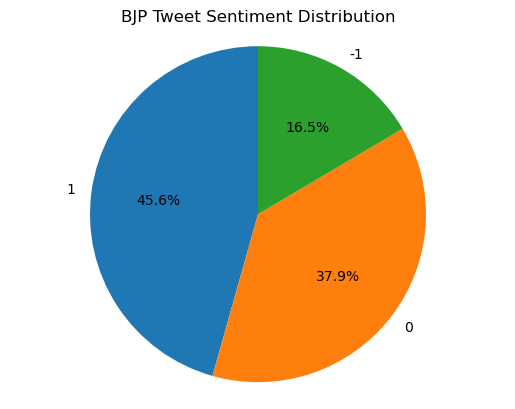

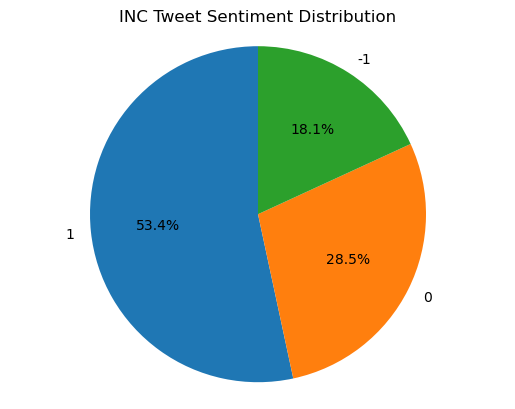

In [56]:
import matplotlib.pyplot as plt

# Function to plot pie chart for sentiment distribution
def plot_sentiment_distribution(df, title):
    sentiment_counts = df['vader_sentiment'].value_counts()
    fig, ax = plt.subplots()
    ax.pie(sentiment_counts, labels = sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.title(title)
    plt.show()

# Plotting pie chart for BJP-related tweets
plot_sentiment_distribution(bjpdf, 'BJP Tweet Sentiment Distribution')

# Plotting pie chart for INC-related tweets
plot_sentiment_distribution(incdf, 'INC Tweet Sentiment Distribution')


In [57]:
bjpdf.info

<bound method DataFrame.info of                                           cleaned_text  sentiment_label  \
0    South India 2024 Loksabha Opinion Poll 132 sea...                0   
1    Veteran actor Nana Patekar say alternative BJP...                1   
2    South India BJP 2019 Loksabha Karnataka 25 Tel...                0   
4    Total number time MMS lok sabha seat ZERO Henc...                0   
7    unhappy upset anyone party stand INDIA allianc...                0   
..                                                 ...              ...   
988  Modi ji ko kya ho gya aaj santa claus lgta hai...                0   
989  wrong prediction NDA set win 80 lok sabha seat...                0   
994  love Indian army never pass without like post ...                0   
996  reverse TMC face huge antiincumbancy hindu vot...                0   
998  Bhai tumhari inhi harkato ki vjh se Pilot saab...                0   

     vader_sentiment  
0                  1  
1                  1 

In [58]:
incdf.info

<bound method DataFrame.info of                                           cleaned_text  sentiment_label  \
0    South India 2024 Loksabha Opinion Poll 132 sea...                0   
2    South India BJP 2019 Loksabha Karnataka 25 Tel...                0   
32   Aam Aadmi Party National Organization General ...                0   
40   Yatnal talk Kharge join congress contest Loksa...                0   
47   WATCH Congress General Secretary incharge Comm...                0   
..                                                 ...              ...   
974  Banerjee suspend Lok Sabha term mimicry art fo...                0   
987  year 1998 BJP single largest party NDA stronge...                0   
989  wrong prediction NDA set win 80 lok sabha seat...                0   
995  make sure Congress put dummy candidate Chevell...                0   
996  reverse TMC face huge antiincumbancy hindu vot...                0   

     vader_sentiment  
0                  1  
2                  1 

In [59]:
# Sample 180 rows randomly from bjpdf
bjp_sampled = bjpdf.sample(n=180, random_state=42)  # random_state for reproducibility


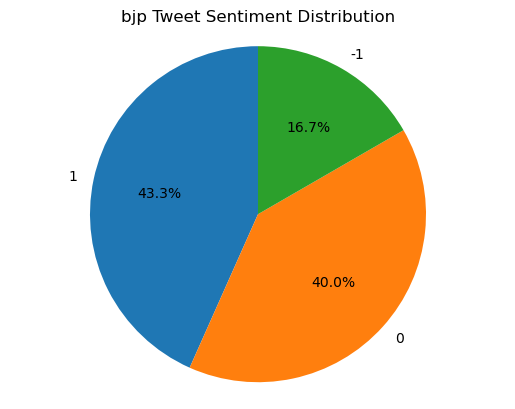

In [60]:
plot_sentiment_distribution(bjp_sampled, 'bjp Tweet Sentiment Distribution')
